In [ ]:
import pandas as pd
weather =pd.read_csv("weather_data.csv",index_col="DATE")

In [ ]:
null_pct=weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.501478
ACSH       0.501426
AWND       0.265256
FMTM       0.475087
PGTM       0.363872
PRCP       0.000000
SNOW       0.000000
SNWD       0.000104
TAVG       0.680406
TMAX       0.000000
TMIN       0.000000
TSUN       0.998393
WDF1       0.501685
WDF2       0.498678
WDF5       0.502981
WDFG       0.734484
WDFM       0.999948
WESD       0.685228
WSF1       0.501530
WSF2       0.498678
WSF5       0.503033
WSFG       0.613055
WSFM       0.999948
WT01       0.630217
WT02       0.935034
WT03       0.933271
WT04       0.982579
WT05       0.981127
WT06       0.990615
WT07       0.994400
WT08       0.796962
WT09       0.992741
WT11       0.999274
WT13       0.886711
WT14       0.954010
WT15       0.997822
WT16       0.658993
WT17       0.996889
WT18       0.939493
WT21       0.999741
WT22       0.997459
WV01       0.999948
dtype: float64

In [ ]:
valid_columns=weather.columns[null_pct<0.05]


In [ ]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [ ]:
weather=weather[valid_columns].copy()

In [ ]:
weather.columns=weather.columns.str.lower()
weather.columns

Index(['station', 'name', 'prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [ ]:
weather=weather.ffill()
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [ ]:
weather.index


Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
       '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21'],
      dtype='object', name='DATE', length=19287)

In [ ]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

We convert our weather dates which are in form of object to date type so that it becomes easier for us to make our model

In [ ]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43


In [ ]:
weather.index=pd.to_datetime(weather.index)

In [ ]:
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21'],
              dtype='datetime64[ns]', name='DATE', length=19287, freq=None)

In [ ]:
weather.index.year

Int64Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=19287)

In [ ]:
weather.index.year.value_counts().sort_index()

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    294
Name: DATE, dtype: int64

we make a new target column that contains tmax temp of next day. Logic is temperature of today and tomorrow are somewhat equal and we can use that to predict temperature.

In [ ]:
weather["target"]=weather.shift(-1)["tmax"]
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0


In [ ]:
weather=weather.ffill()
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0


In [ ]:
weather.corr()

<ipython-input-17-7abb8bc3d4be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather.corr()


,prcp,snow,snwd,tmax,tmin,target
prcp,1.000000,0.151051,0.001178,-0.007210,0.052279,-0.003358
snow,0.151051,1.000000,0.232567,-0.175075,-0.159285,-0.172737
snwd,0.001178,0.232567,1.000000,-0.259858,-0.256977,-0.241054
tmax,-0.007210,-0.175075,-0.259858,1.000000,0.955487,0.915296
tmin,0.052279,-0.159285,-0.256977,0.955487,1.000000,0.915461
target,-0.003358,-0.172737,-0.241054,0.915296,0.915461,1.000000


we use ridge regression that helps in removing collinearity that is a problem in normal linear regression.

In [ ]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=.1)


alpha controls how much coefficients are shrunk to account for collinearity

In [ ]:
predictor=weather.columns[~weather.columns.isin(["target","name","station"])]


predictors are columns that we used to predict our data.

In [ ]:
predictor

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

here we have time-series data so we cannot use cross-validation time series data means tomorrow data is simmiliar to today's data only. We dont use future data to predict the past data.

In [ ]:
def backtest(weather,model,predictor,start=3650,step=90):
  all_preds=[]
  for i in range(start,weather.shape[0],step):

    train=weather.iloc[:i,:]
    test=weather.iloc[i:(i+step),:]

    model.fit(train[predictor],train["target"])

    preds=model.predict(test[predictor])
    preds=pd.Series(preds,index=test.index)

    combined=pd.concat([test["target"],preds],axis=1)

    combined.columns=["actual","prediction"]

    combined["diff"]=(combined["prediction"]-combined["actual"]).abs()

    all_preds.append(combined)
  return pd.concat(all_preds)



In [ ]:
predictions=backtest(weather,rr,predictor)

In [ ]:
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2022-10-17,58.0,67.543412,9.543412
2022-10-18,56.0,60.511771,4.511771
2022-10-19,61.0,57.030435,3.969565


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"],predictions["prediction"])

5.139326679660841

or you could do

In [ ]:
predictions["diff"].mean()

5.139326679660841

In [ ]:
pred2=predictions.iloc[:,:-1]

In [ ]:
pred2

,actual,prediction
DATE,,
1979-12-30,43.0,50.229324
1979-12-31,42.0,43.673798
1980-01-01,41.0,41.579150
1980-01-02,36.0,43.961887
1980-01-03,30.0,40.204726
...,...,...
2022-10-17,58.0,67.543412
2022-10-18,56.0,60.511771
2022-10-19,61.0,57.030435


<Axes: xlabel='DATE'>

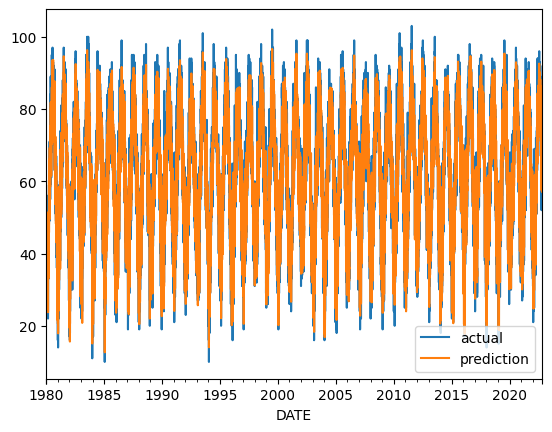

In [ ]:
pred2.plot()